# A Complete Sample of Machine Learning Project

In [1]:
# Library
import pandas as pd
import numpy as np
import tarfile
import urllib.request
import os
from pathlib import Path


## Download the Data and take a look

In [2]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing= load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Visualization

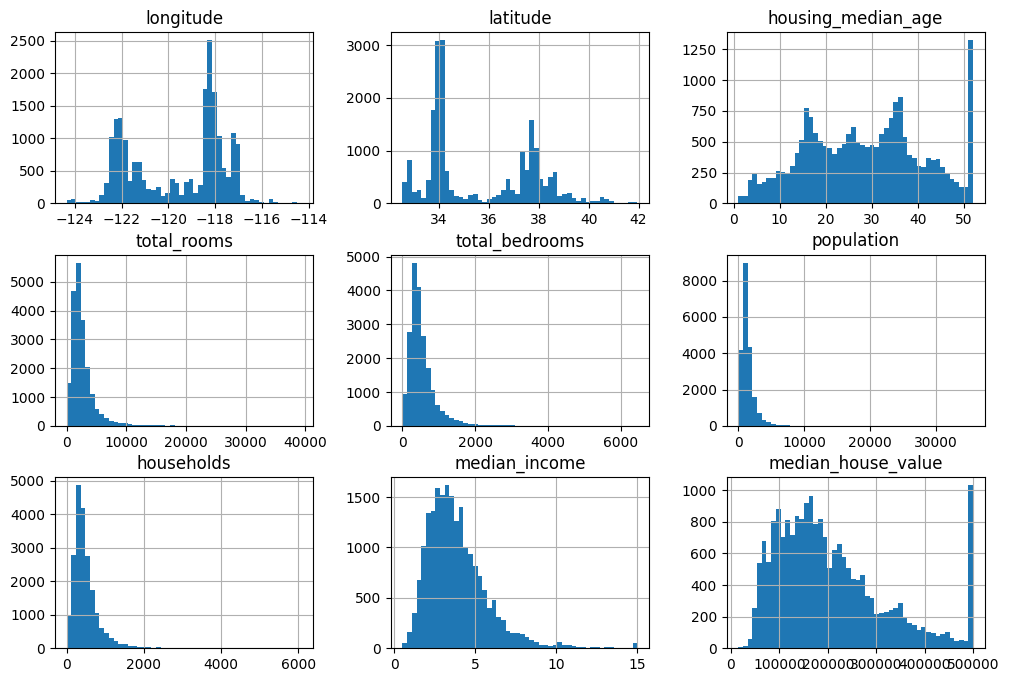

In [5]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(12, 8))
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

### Income Median

In [7]:
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0.,1.5,3.8,4.5,6.,np.inf],
                              labels=[1,2,3,4,5])

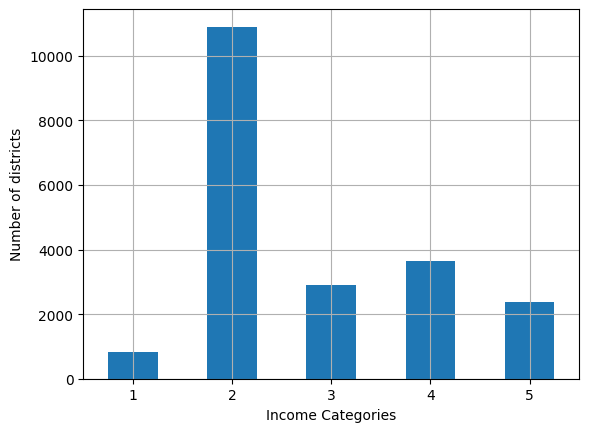

In [8]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("Income Categories")
plt.ylabel("Number of districts")
plt.show()

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits=[]
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [10]:
strat_train_set, strat_test_set = strat_splits[0]
strat_train_set, strat_test_set 

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 12020    -120.37     37.98                29.0       2508.0           591.0   
 16992    -118.44     34.06                28.0       3910.0           959.0   
 5800     -117.42     34.59                 8.0       5445.0          1360.0   
 10639    -114.58     33.63                29.0       1387.0           236.0   
 20454    -122.24     37.48                47.0       2423.0           407.0   
 ...          ...       ...                 ...          ...             ...   
 1703     -117.95     33.86                35.0       2375.0           439.0   
 17800    -122.43     37.75                52.0       2155.0           468.0   
 2176     -122.50     37.77                52.0       2739.0           569.0   
 15098    -118.09     33.92                35.0       1994.0           419.0   
 10468    -122.11     37.70                19.0       2693.0           789.0   
 
        population  households  median

In [11]:
# or ez way
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, 
                                                   stratify=housing["income_cat"], random_state=42)
strat_train_set, strat_test_set

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 12020    -120.37     37.98                29.0       2508.0           591.0   
 16992    -118.44     34.06                28.0       3910.0           959.0   
 5800     -117.42     34.59                 8.0       5445.0          1360.0   
 10639    -114.58     33.63                29.0       1387.0           236.0   
 20454    -122.24     37.48                47.0       2423.0           407.0   
 ...          ...       ...                 ...          ...             ...   
 1703     -117.95     33.86                35.0       2375.0           439.0   
 17800    -122.43     37.75                52.0       2155.0           468.0   
 2176     -122.50     37.77                52.0       2739.0           569.0   
 15098    -118.09     33.92                35.0       1994.0           419.0   
 10468    -122.11     37.70                19.0       2693.0           789.0   
 
        population  households  median

In [12]:
# we dont need income_cat anymore
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Data Visualization

In [13]:
housing = strat_train_set.copy()
type(housing)

pandas.core.frame.DataFrame

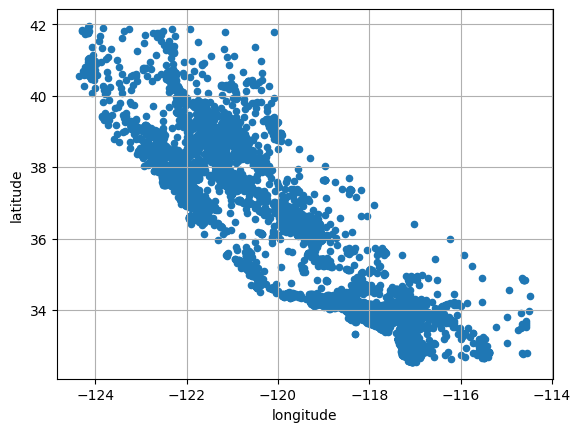

In [14]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()
# it lookes like California right?

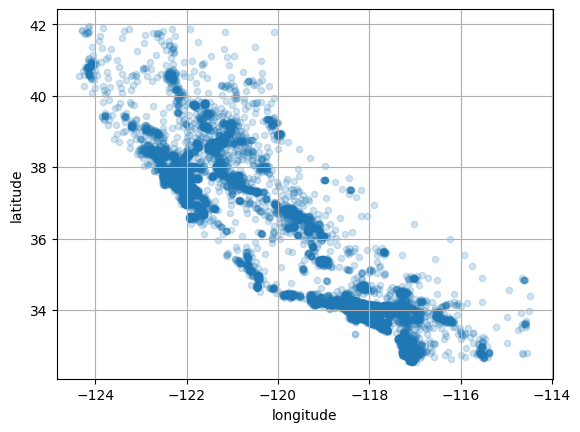

In [15]:
# The scatter alpha is controling ransparency, we can see which place is more intensive
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()
# it lookes like the houses are closing the coast

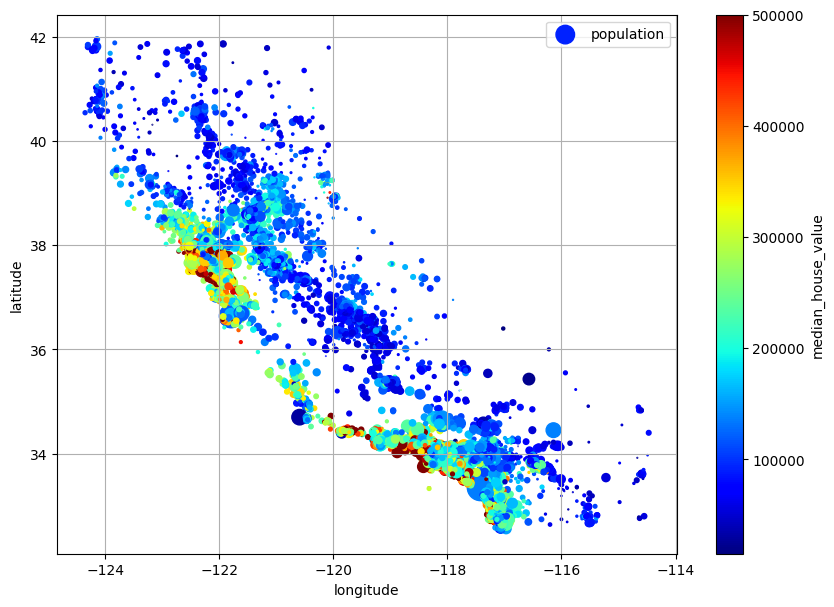

In [16]:
# colorize to show the price
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, 
            s=housing["population"]/100, label="population", c="median_house_value", cmap="jet",
            colorbar=True, legend=True, sharex=False, figsize=(10,7))
plt.show()
# blue means cheap, bigger point means more pop

## Search the correlation

In [17]:
# to avoid ocrean_proximity is not value
corr_matrix = (housing.iloc[:,:-1]).corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.101354,0.045280,0.069064,0.098017,0.054913,-0.013968,-0.044315
latitude,-0.924478,1.000000,0.003643,-0.036476,-0.066519,-0.107531,-0.070926,-0.081096,-0.145793
housing_median_age,-0.101354,0.003643,1.000000,-0.365448,-0.322528,-0.293834,-0.304155,-0.119879,0.103082
total_rooms,0.045280,-0.036476,-0.365448,1.000000,0.931237,0.853551,0.917771,0.195588,0.131712
total_bedrooms,0.069064,-0.066519,-0.322528,0.931237,1.000000,0.875981,0.979048,-0.009883,0.048076
population,0.098017,-0.107531,-0.293834,0.853551,0.875981,1.000000,0.905825,0.000837,-0.026726
households,0.054913,-0.070926,-0.304155,0.917771,0.979048,0.905825,1.000000,0.010353,0.063247
median_income,-0.013968,-0.081096,-0.119879,0.195588,-0.009883,0.000837,0.010353,1.000000,0.688171
median_house_value,-0.044315,-0.145793,0.103082,0.131712,0.048076,-0.026726,0.063247,0.688171,1.000000


In [18]:
corr_matrix["median_house_value"].sort_values(ascending=False)
# we can found that income is strongest correlation

median_house_value    1.000000
median_income         0.688171
total_rooms           0.131712
housing_median_age    0.103082
households            0.063247
total_bedrooms        0.048076
population           -0.026726
longitude            -0.044315
latitude             -0.145793
Name: median_house_value, dtype: float64

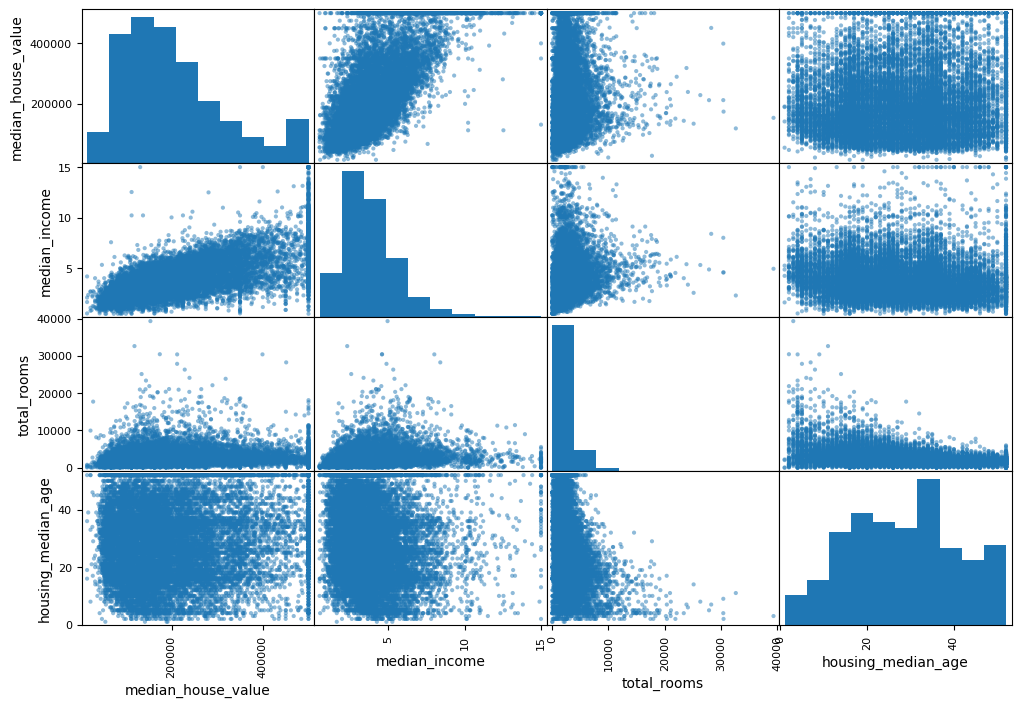

In [19]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
             "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()


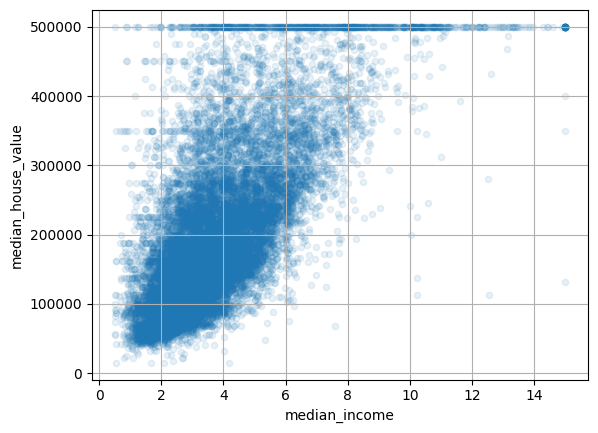

In [20]:
housing.plot(kind="scatter", x="median_income", y ="median_house_value", alpha=0.1, grid=True)
plt.show()

In [21]:
# lets try new attritubes
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing['population'] / housing["households"]

In [22]:
corr_matrix = (housing.drop(columns=["ocean_proximity"])).corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_house,bedrooms_ratio,people_per_house
longitude,1.000000,-0.924478,-0.101354,0.045280,0.069064,0.098017,0.054913,-0.013968,-0.044315,-0.026572,0.091957,0.001335
latitude,-0.924478,1.000000,0.003643,-0.036476,-0.066519,-0.107531,-0.070926,-0.081096,-0.145793,0.105298,-0.113346,-0.001639
housing_median_age,-0.101354,0.003643,1.000000,-0.365448,-0.322528,-0.293834,-0.304155,-0.119879,0.103082,-0.149781,0.135997,0.015701
total_rooms,0.045280,-0.036476,-0.365448,1.000000,0.931237,0.853551,0.917771,0.195588,0.131712,0.127042,-0.186361,-0.023233
total_bedrooms,0.069064,-0.066519,-0.322528,0.931237,1.000000,0.875981,0.979048,-0.009883,0.048076,0.000793,0.083195,-0.026609
population,0.098017,-0.107531,-0.293834,0.853551,0.875981,1.000000,0.905825,0.000837,-0.026726,-0.073874,0.035557,0.070326
households,0.054913,-0.070926,-0.304155,0.917771,0.979048,0.905825,1.000000,0.010353,0.063247,-0.081447,0.064224,-0.025595
median_income,-0.013968,-0.081096,-0.119879,0.195588,-0.009883,0.000837,0.010353,1.000000,0.688171,0.310918,-0.613173,0.020641
median_house_value,-0.044315,-0.145793,0.103082,0.131712,0.048076,-0.026726,0.063247,0.688171,1.000000,0.146099,-0.253358,-0.019611
rooms_per_house,-0.026572,0.105298,-0.149781,0.127042,0.000793,-0.073874,-0.081447,0.310918,0.146099,1.000000,-0.395533,-0.004688


In [29]:
corr_matrix["median_house_value"].sort_values(ascending=False)
# bedrooms_ratio is a new strongest negative corr, 

median_house_value    1.000000
median_income         0.688171
rooms_per_house       0.146099
total_rooms           0.131712
housing_median_age    0.103082
households            0.063247
total_bedrooms        0.048076
people_per_house     -0.019611
population           -0.026726
longitude            -0.044315
latitude             -0.145793
bedrooms_ratio       -0.253358
Name: median_house_value, dtype: float64

## Prepare Data for ML
    Data clean

In [30]:
# first way
housing = strat_train_set.drop("median_house_value", axis=1)
housing_label = strat_train_set["median_house_value"].copy()
housing.dropna("subset" = ["total_bedrooms"], inplace=True)
# Second way, fillna
housing["total_bedrooms"].fillna(housing["total_bedrooms"].median(), inplace=True)

In [33]:
# thrid way, choise all attritube which can get median
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median") # "mean", "most_frequent", "constant", 
housing_num = housing.select_dtypes(include=[np.number])

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [35]:
imputer.statistics_

array([-118.49  ,   34.26  ,   29.    , 2121.    ,  433.    , 1163.    ,
        408.    ,    3.5271])

In [36]:
housing_num.median().values

array([-118.49  ,   34.26  ,   29.    , 2121.    ,  433.    , 1163.    ,
        408.    ,    3.5271])

In [37]:
x = imputer.transform(housing_num)
x

array([[-1.2037e+02,  3.7980e+01,  2.9000e+01, ...,  1.1120e+03,
         5.5000e+02,  1.6021e+00],
       [-1.1844e+02,  3.4060e+01,  2.8000e+01, ...,  1.7630e+03,
         8.6700e+02,  5.5000e+00],
       [-1.1742e+02,  3.4590e+01,  8.0000e+00, ...,  3.2200e+03,
         1.2140e+03,  1.7567e+00],
       ...,
       [-1.2250e+02,  3.7770e+01,  5.2000e+01, ...,  1.3120e+03,
         5.3100e+02,  3.5833e+00],
       [-1.1809e+02,  3.3920e+01,  3.5000e+01, ...,  1.4910e+03,
         4.2800e+02,  3.7383e+00],
       [-1.2211e+02,  3.7700e+01,  1.9000e+01, ...,  1.7650e+03,
         7.2400e+02,  2.4206e+00]])

## Scikit-Learn

In [39]:
"""
estimator
transformer
predictor
"""
housing = pd.DataFrame(x, columns=housing_num.columns,
                      index=housing_num.index)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12020,-120.37,37.98,29.0,2508.0,591.0,1112.0,550.0,1.6021
16992,-118.44,34.06,28.0,3910.0,959.0,1763.0,867.0,5.5000
5800,-117.42,34.59,8.0,5445.0,1360.0,3220.0,1214.0,1.7567
10639,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438
20454,-122.24,37.48,47.0,2423.0,407.0,1010.0,407.0,6.2154
...,...,...,...,...,...,...,...,...
1703,-117.95,33.86,35.0,2375.0,439.0,1343.0,424.0,4.5300
17800,-122.43,37.75,52.0,2155.0,468.0,962.0,490.0,3.7750
2176,-122.50,37.77,52.0,2739.0,569.0,1312.0,531.0,3.5833
15098,-118.09,33.92,35.0,1994.0,419.0,1491.0,428.0,3.7383
